#**1. Import Libraries**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. Load Dataset**

In [ ]:
import pandas as pd

# Baca dataset dari file Excel (.xlsx)
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dirty_Cafe_Sales_Final.xlsx')

# Tampilkan ukuran dataset
print('Ukuran dataset : %d baris dan %d kolom\n' % (dataset.shape[0], dataset.shape[1]))

# Tampilkan 5 data teratas
print('Lima data teratas : ')
print(dataset.head())


Ukuran dataset : 9540 baris dan 8 kolom

Lima data teratas : 
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee         2              20           40   
1    TXN_4977031    Cake         4              30          120   
2    TXN_4271903  Cookie         4              10           40   
3    TXN_7034554   Salad         2              50          100   
4    TXN_3160411  Coffee         2              20           40   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-Store       2023-05-16  
2     Credit Card  In-Store       2023-07-19  
3         Unknown   Unknown       2023-04-27  
4  Digital Wallet  In-Store       2023-06-11  


#**3. Menambahkan kolom order_month pada dataset**

In [ ]:
import datetime
# Buat kolom baru 'order_month' dari kolom 'Transaction Date'
dataset['order_month'] = pd.to_datetime(dataset['Transaction Date'], errors='coerce').dt.strftime('%Y-%m')

# Tampilkan hasil
print('Ukuran dataset : %d baris dan %d kolom\n' % (dataset.shape[0], dataset.shape[1]))
print('Lima data teratas :')
print(dataset.head())

Ukuran dataset : 9540 baris dan 9 kolom

Lima data teratas :
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee         2              20           40   
1    TXN_4977031    Cake         4              30          120   
2    TXN_4271903  Cookie         4              10           40   
3    TXN_7034554   Salad         2              50          100   
4    TXN_3160411  Coffee         2              20           40   

   Payment Method  Location Transaction Date order_month  
0     Credit Card  Takeaway       2023-09-08     2023-09  
1            Cash  In-Store       2023-05-16     2023-05  
2     Credit Card  In-Store       2023-07-19     2023-07  
3         Unknown   Unknown       2023-04-27     2023-04  
4  Digital Wallet  In-Store       2023-06-11     2023-06  


In [ ]:
print(dataset.columns)


Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


#**4. Menambahkan kolom gmv pada dataset**

In [ ]:
# Buat kolom GMV (Gross Merchandise Value)
dataset['gmv'] = dataset['Price Per Unit'] * dataset['Quantity']

# Tampilkan hasil
print('Ukuran dataset : %d baris dan %d kolom\n' % (dataset.shape[0], dataset.shape[1]))
print('Lima data teratas :')
print(dataset.head())


Ukuran dataset : 9540 baris dan 10 kolom

Lima data teratas :
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee         2              20           40   
1    TXN_4977031    Cake         4              30          120   
2    TXN_4271903  Cookie         4              10           40   
3    TXN_7034554   Salad         2              50          100   
4    TXN_3160411  Coffee         2              20           40   

   Payment Method  Location Transaction Date order_month  gmv  
0     Credit Card  Takeaway       2023-09-08     2023-09   40  
1            Cash  In-Store       2023-05-16     2023-05  120  
2     Credit Card  In-Store       2023-07-19     2023-07   40  
3         Unknown   Unknown       2023-04-27     2023-04  100  
4  Digital Wallet  In-Store       2023-06-11     2023-06   40  


#**5. Menambahkan data agregat**

In [ ]:
montly_amount_sales = dataset.groupby(by=["order_month"]).agg({
    "gmv": "sum"
})
print (montly_amount_sales)


               gmv
order_month       
2023-01      72580
2023-02      66730
2023-03      72155
2023-04      71935
2023-05      69785
2023-06      74175
2023-07      69275
2023-08      71010
2023-09      68860
2023-10      73535
2023-11      70210
2023-12      72215


#**6. visualisasi 1 - Membuat Line Chart Trend Pertumbuhan GMV**

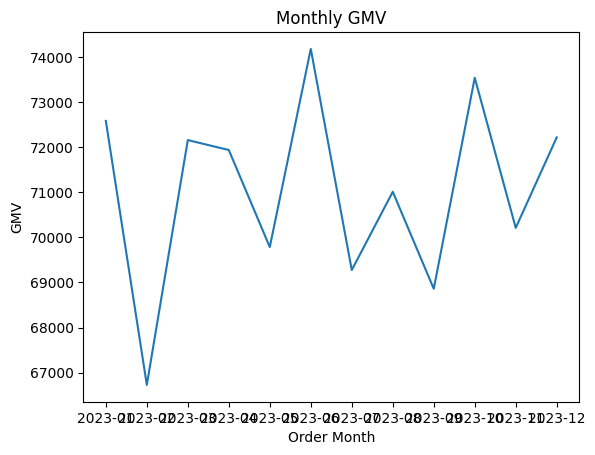

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.plot(montly_amount_sales.index, montly_amount_sales['gmv'])
plt.title('Monthly GMV')
plt.xlabel('Order Month')
plt.ylabel('GMV')
plt.show()


#**7. Mengubah Figure Size**

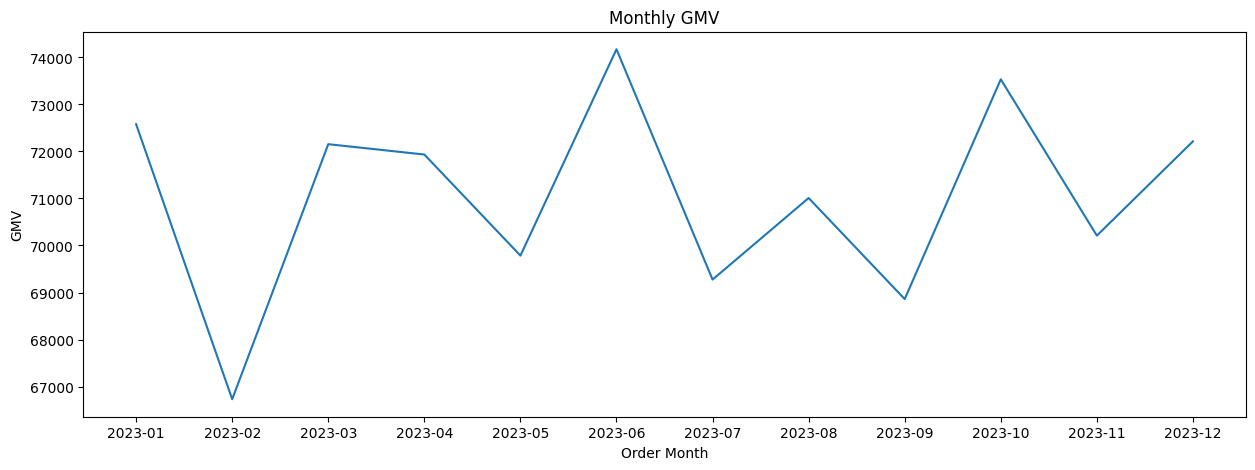

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(15,5))
plt.plot(montly_amount_sales.index, montly_amount_sales['gmv'])
plt.title('Monthly GMV')
plt.xlabel('Order Month')
plt.ylabel('GMV')
plt.show()

#**8. Menambahkan Title dan Axis Labels**

<Figure size 1500x500 with 0 Axes>

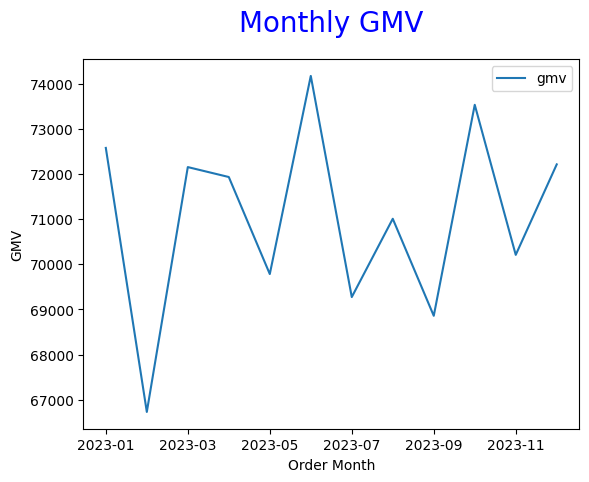

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(15,5))
dataset.groupby(by=["order_month"]).agg({
    "gmv":"sum"
}).plot(
    kind='line'
)
plt.title('Monthly GMV', loc = 'center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month')
plt.ylabel('GMV')
plt.show()

# **9. Modifikasi Line dan Point**

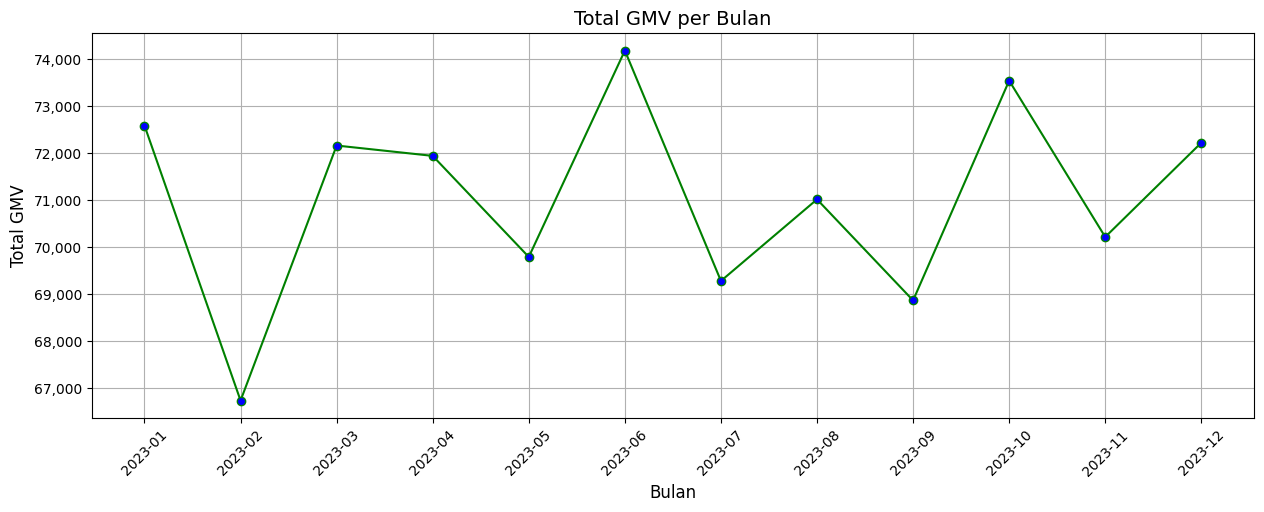

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Buat agregasi total GMV per bulan
gmv_per_bulan = dataset.groupby('order_month')['gmv'].sum().reset_index()

# Membuat figure
plt.figure(figsize=(15,5))

# Plot line chart
plt.plot(
    gmv_per_bulan['order_month'],
    gmv_per_bulan['gmv'],
    color='green',
    marker='o',
    markerfacecolor='blue',
    markersize=6
)

# Menambahkan judul dan label
plt.title('Total GMV per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total GMV', fontsize=12)

# Format angka agar lebih mudah dibaca
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Rotasi label sumbu X biar rapi
plt.xticks(rotation=45)

# Tampilkan grid dan grafik
plt.grid(True)
plt.show()


#**10. Modifikasi Grid**

<Figure size 1500x500 with 0 Axes>

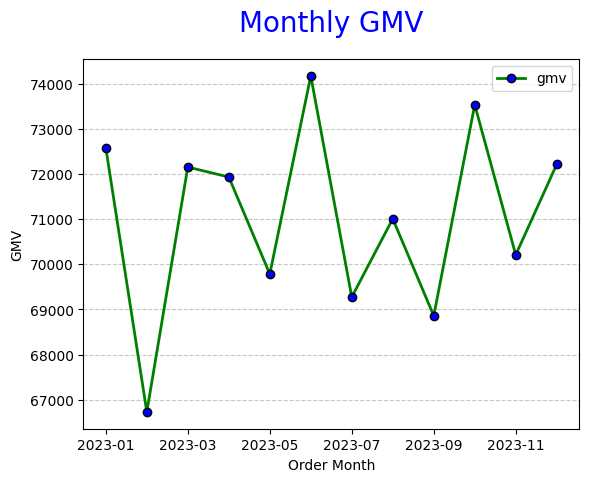

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(15,5))
dataset.groupby(by=["order_month"]).agg({
    "gmv":"sum"
}).plot(
    kind='line',
    linewidth=2,
    color='green',
    marker='o',
    markerfacecolor='blue',
    markersize=6,
    markeredgecolor='black'
)
plt.title('Monthly GMV', loc = 'center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month')
plt.ylabel('GMV')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#**11. Menambahkan Informasi pada Plot**

/tmp/ipython-input-1144089766.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels((labels / 1_000_000).astype(int))


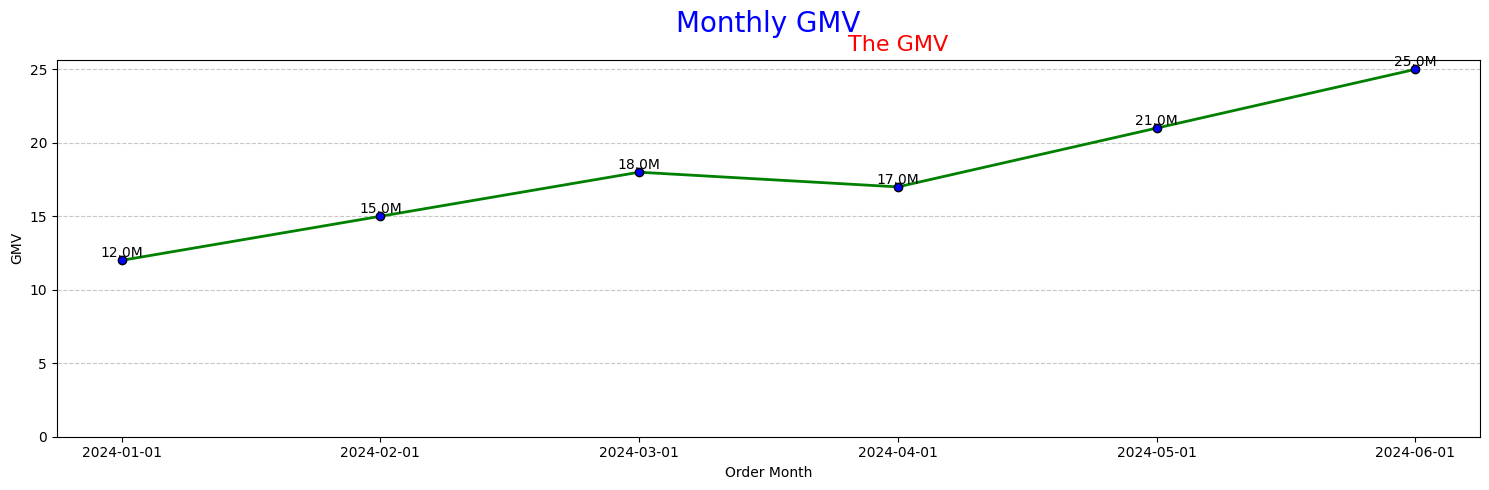

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung GMV per bulan
gmv_per_bulan = dataset.groupby(['order_month'])['gmv'].sum().reset_index()

# Pastikan urutan bulan berurutan
gmv_per_bulan = gmv_per_bulan.sort_values('order_month')

# Konversi kolom order_month menjadi string agar tidak error di axis
gmv_per_bulan['order_month'] = gmv_per_bulan['order_month'].astype(str)

# Buat figure & axis dengan subplots() (lebih stabil di Colab)
fig, ax = plt.subplots(figsize=(15,5))

# Plot data
ax.plot(
    gmv_per_bulan['order_month'],
    gmv_per_bulan['gmv'],
    linewidth=2,
    color='green',
    marker='o',
    markerfacecolor='blue',
    markersize=6,
    markeredgecolor='black'
)

# Tambahkan judul dan label sumbu
ax.set_title('Monthly GMV', loc='center', pad=20, fontsize=20, color='blue')
ax.set_xlabel('Order Month')
ax.set_ylabel('GMV')

# Tambahkan grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Pastikan mulai dari nol
ax.set_ylim(ymin=0)

# Ubah label sumbu Y ke jutaan
labels = ax.get_yticks()
ax.set_yticklabels((labels / 1_000_000).astype(int))

# Tambahkan teks “The GMV”
ax.text(
    x=len(gmv_per_bulan['order_month']) // 2,
    y=max(gmv_per_bulan['gmv']) * 1.05,
    s="The GMV",
    fontsize=16,
    color='red',
    ha='center'
)

# Tambahkan label GMV tiap titik
for i, value in enumerate(gmv_per_bulan['gmv']):
    ax.text(
        gmv_per_bulan['order_month'].iloc[i],
        value,
        f'{value / 1_000_000:.1f}M',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


✅ File CSV berhasil disimpan: GMV_Per_Bulan.csv
✅ Grafik berhasil disimpan: Dirty_Cafe_Monthly_GMV.png


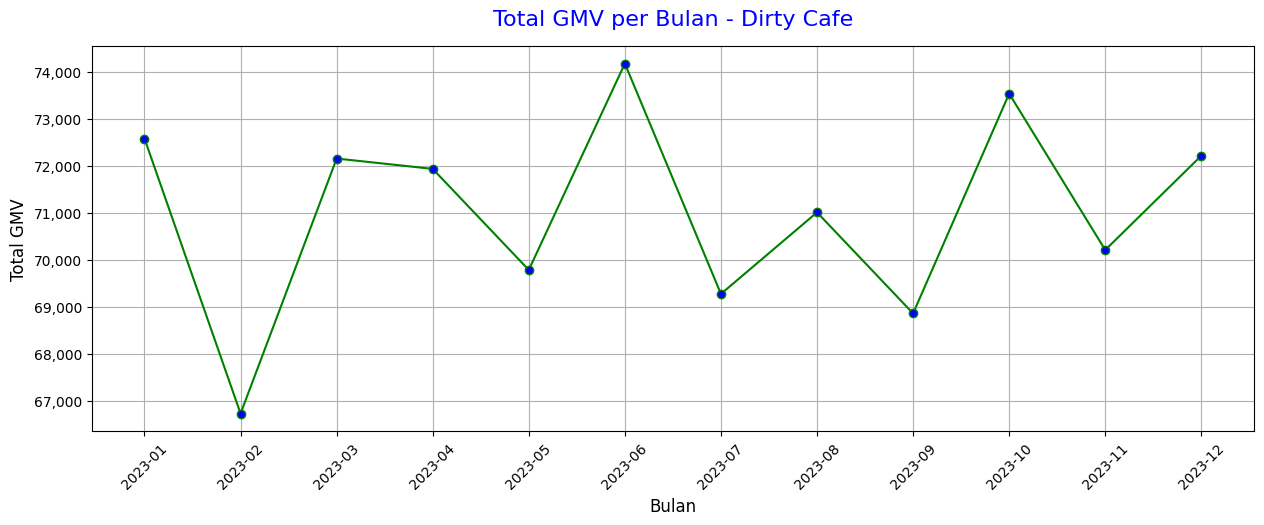

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1️⃣ Baca Dataset ---
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dirty_Cafe_Sales_Final.xlsx')

# --- 2️⃣ Buat kolom order_month & GMV ---
dataset['order_month'] = pd.to_datetime(dataset['Transaction Date'], errors='coerce').dt.strftime('%Y-%m')
dataset['gmv'] = dataset['Price Per Unit'] * dataset['Quantity']

# --- 3️⃣ Hitung total GMV per bulan ---
gmv_per_bulan = dataset.groupby('order_month')['gmv'].sum().reset_index()

# --- 4️⃣ Simpan hasil agregasi ke file CSV ---
gmv_per_bulan.to_csv('/content/drive/MyDrive/Colab Notebooks/GMV_Per_Bulan.csv', index=False)
print("✅ File CSV berhasil disimpan: GMV_Per_Bulan.csv")

# --- 5️⃣ Visualisasi data ---
plt.figure(figsize=(15,5))
plt.plot(
    gmv_per_bulan['order_month'],
    gmv_per_bulan['gmv'],
    color='green',
    marker='o',
    markerfacecolor='blue',
    markersize=6
)

# --- 6️⃣ Tambahkan elemen visual ---
plt.title('Total GMV per Bulan - Dirty Cafe', fontsize=16, color='blue', pad=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total GMV', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# --- 7️⃣ Simpan visualisasi ke file gambar ---
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Dirty_Cafe_Monthly_GMV.png', bbox_inches='tight', dpi=300)
print("✅ Grafik berhasil disimpan: Dirty_Cafe_Monthly_GMV.png")

# --- 8️⃣ Tampilkan grafik di layar ---
plt.show()
